# WARNING - STOP AND READ THIS FIRST    
For reasons that are detailed in the root README.md, I'm using Cauldron notebooks in this project to display meaningful results. 

*Any Jupyter notebooks are just exploratory chicken scratches and will be essentially meaningless.*

If you want to see meaningful outputs, you have three easy options:
- Option 1: check within this directory for a folder called 'html' - within that directory will be an html file where you can see all the visuals.
- Option 2: go to http://unnotebook.com/reader-install/ and install the reader, and point it to the EDA.cauldron file in this directory. The install is actually fast and easy, and the visuals look the best in this format.
- Option 3: check this directory for a pdf that I've printed from the Cauldron notebook. This is just visuals without code, and the visuals aren't as good as the other two options.

In [1]:
from fastai.tabular import add_datepart
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from tqdm import tqdm

%matplotlib inline
#%matplotlib notebook

In [2]:
df = pd.read_csv('../../data/processed/wrangled_dataframe.csv', header=0, low_memory=False)
df['date'] = pd.to_datetime(df['date'])

In [3]:
open = df[df.open == 1].copy()

In [4]:
dfex = df[:100]
dfex.head()

,store,state,date,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,...,promo_interval,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start
0,1,HE,2013-01-01,8,6,3,6,3,1,93,...,None,1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
1,56,HE,2013-01-01,8,6,3,6,3,1,93,...,"Mar,Jun,Sept,Dec",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2,69,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
3,77,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
4,111,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30


In [5]:
di = df.copy()
di['date'] = pd.to_datetime(di.date)
di['week_start'] = pd.to_datetime(di.week_start)
di.set_index('date', inplace=True)

In [6]:
diex = di.copy()
diex = diex[:100]
diex.sort_index(inplace=True)
diex.head()

,store,state,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,mean_humidity,...,promo_interval,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,HE,8,6,3,6,3,1,93,80,...,None,1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,56,HE,8,6,3,6,3,1,93,80,...,"Mar,Jun,Sept,Dec",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,69,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,77,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,111,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30


promo_last_5
0.0    0.315249
0.2    0.154344
0.4    0.153420
0.6    0.127568
0.8    0.170110
1.0    0.079308
Name: state, dtype: float64


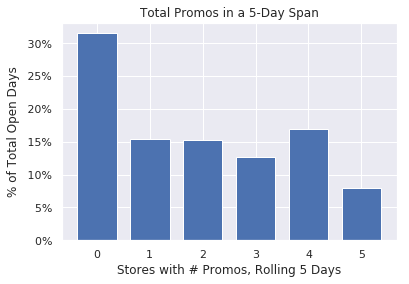

In [39]:
# The first promo was on 2013-01-07, so a rolling 5-day window with nans filled with zero is all correct
#roll5 = df.copy()
#roll5.set_index(['store', 'date'], inplace=True)
#roll5.sort_index(inplace=True)
#roll5['promo_last_5'] = roll5.promo.rolling(5).mean()
#roll5['promo_last_5'].fillna(0, inplace=True)
#roll5['uplift'] = roll5.sales / roll5.sales.rolling(5).mean() - 1
#roll5['uplift'].fillna(0, inplace=True)
#plt.plot(roll5.groupby('promo_last_5').count())
avg_promo_last_5 = roll5[roll5.open == 1].groupby('promo_last_5').state.count()/len(roll5[roll5.open == 1])

print(avg_promo_last_5)
fig, ax = plt.subplots()
ax.bar(x=avg_promo_last_5.index, height=avg_promo_last_5.values, width=0.15)
ax.set_title('Total Promos in a 5-Day Span')
ax.set_xlabel('Stores with # Promos, Rolling 5 Days')
ax.set_ylabel('% of Total Open Days')
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()]) 
ax.set_xticklabels(['{:1.0f}'.format(x*5) for x in ax.get_xticks()]) ;

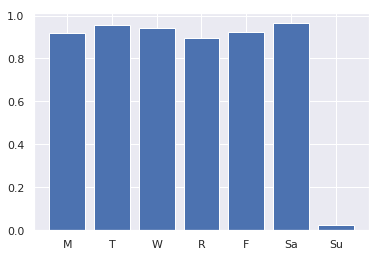

In [15]:
ax = plt.bar(x=['M', 'T', 'W', 'R', 'F', 'Sa', 'Su'], height=df.groupby('day_of_week').open.mean().values)

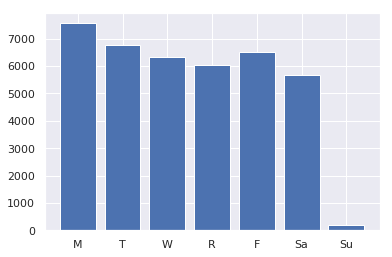

In [16]:
ax = plt.bar(x=['M', 'T', 'W', 'R', 'F', 'Sa', 'Su'], height=df.groupby('day_of_week').sales.mean())

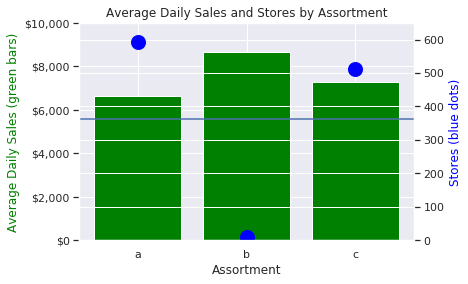

In [53]:
open = df[df.open == 1].copy()

avg_daily_sales_by_assortment = open.groupby('assortment').sales.mean()
# Divide by 942 because there are 942 days in the data set, note using df instead of open
store_count_by_assortment = df.groupby('assortment').store.count()/942

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=avg_daily_sales_by_assortment.index, height=avg_daily_sales_by_assortment, color='green')
ax_l.set_ylim([0, 10000])
ax_r.plot(store_count_by_assortment, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 650])

ax_l.set_title('Average Daily Sales and Stores by Assortment')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('Assortment')
ax_l.axhline(df.sales.mean());

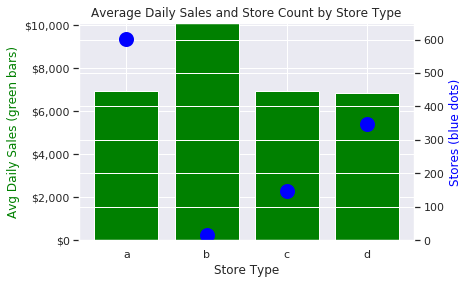

In [54]:
open = df[df.open == 1].copy()
avg_daily_sales_by_store_type = open.groupby('store_type').sales.mean()
# Divide by 942 because there are 942 days in the data set, note using df instead of open
store_count_by_store_type = df.groupby('store_type').store.count()/942

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=avg_daily_sales_by_store_type.index, height=avg_daily_sales_by_store_type, color='green')
ax_l.set_ylim([0, 10100])
ax_r.plot(store_count_by_store_type, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 650])

ax_r.set_title('Average Daily Sales and Store Count by Store Type')
ax_l.set_ylabel('Avg Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('Store Type');

# 17 stores have store_type 'b' and 148 stores have store_type 'c', while 602 have 'a' and 348 have 'd'
# len(df[df.store_type == 'b'])/942 # 17
# len(df[df.store_type == 'a'])/942 # 602
# len(df[df.store_type == 'c'])/942 # 148
# len(df[df.store_type == 'd'])/942 # 348

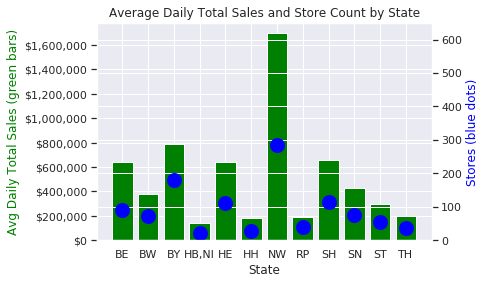

In [56]:
open = df[df.open == 1].copy()
sales_by_state = open.groupby('state').sales.sum()/942
# Divide by 942 because there are 942 days in the data set, note using df not open
stores_by_states = df.groupby('state').store.count()/942

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=sales_by_state.index, height=sales_by_state, color='green')
#ax_l.set_ylim([0, 10100])
ax_r.plot(stores_by_states, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 650])

ax_r.set_title('Average Daily Total Sales and Store Count by State')
ax_l.set_ylabel('Avg Daily Total Sales (green bars)', color='green')
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_l.set_xlabel('State');

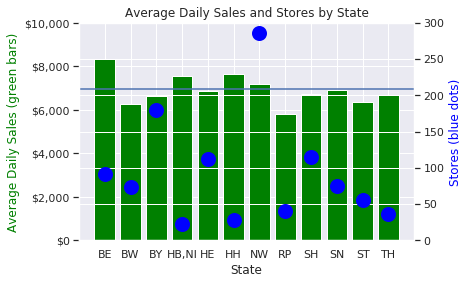

In [57]:
# Same chart as above but restricted only to open stores
open = df[df.open == 1]
#total_sales_by_state = open[['sales', 'state']].groupby('state').sum()
#store_counts_by_state = (open[['store', 'state']].groupby('state').count().values/942).reshape(12,)
#avg_daily_sales_by_state = \
#    np.array(total_sales_by_state['sales']).reshape(12,) / (store_counts_by_state * 942)
avg_daily_sales_by_state = open.groupby('state').sales.mean()

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=avg_daily_sales_by_state.index, height=avg_daily_sales_by_state, color='green')
ax_l.set_ylim([0, 10000])
# Note that here we're plotting by df (including days closed) rather than 'open' because each store may be open 
# less than 942 days - the variable being plotted is a basic store count, not store*days, so I just used df
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df.groupby('state').store.count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 300])

ax_l.set_title('Average Daily Sales and Stores by State')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('State')
ax_l.axhline(open.sales.mean());

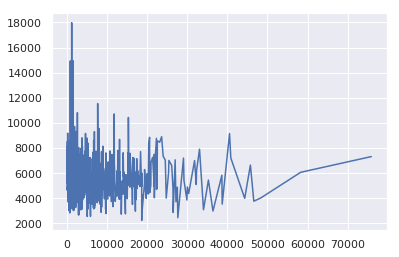

In [54]:
# No relationship between daily avg sales and nearest competition
total_sales_by_competition_distance = \
    np.array(df[['competition_distance', 'sales']].groupby('competition_distance').sum()[['sales']]).reshape(-1)
store_counts_by_competition_distance = \
    np.array(df[['competition_distance', 'store']].groupby('competition_distance').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_distance = \
    total_sales_by_competition_distance / (store_counts_by_competition_distance * 942)
xs = np.array((df[['competition_distance', 'sales']].groupby('competition_distance').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_distance);

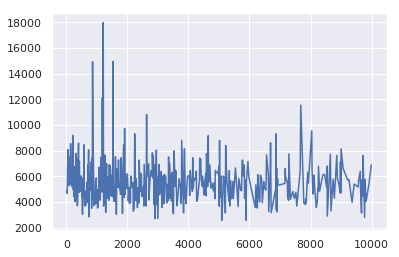

In [55]:
# No relationship between daily avg sales and nearest competition - even for <10km
u10 = df[df.competition_distance <= 10000]
total_sales_by_competition_distance = \
    np.array(u10[['competition_distance', 'sales']].groupby('competition_distance').sum()[['sales']]).reshape(-1)
store_counts_by_competition_distance = \
    np.array(u10[['competition_distance', 'store']].groupby('competition_distance').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_distance = \
    total_sales_by_competition_distance / (store_counts_by_competition_distance * 942)
xs = np.array((u10[['competition_distance', 'sales']].groupby('competition_distance').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_distance);

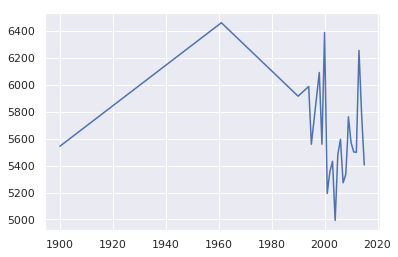

In [56]:
# Weird chart but looks like a rough correlation since 2000
total_sales_by_competition_open_since_year = \
    np.array(df[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()[['sales']]).reshape(-1)
store_counts_by_competition_open_since_year = \
    np.array(df[['competition_open_since_year', 'store']].groupby('competition_open_since_year').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_open_since_year = \
    total_sales_by_competition_open_since_year / (store_counts_by_competition_open_since_year * 942)
xs = np.array((df[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_open_since_year);

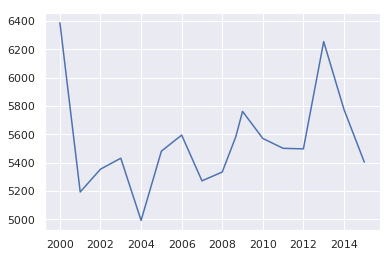

In [57]:
# Rough correlation since 2000 - check the store counts
s2000 = df[df.competition_open_since_year >= 2000]
total_sales_by_competition_open_since_year = \
    np.array(s2000[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()[['sales']]).reshape(-1)
store_counts_by_competition_open_since_year = \
    np.array(s2000[['competition_open_since_year', 'store']].groupby('competition_open_since_year').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_open_since_year = \
    total_sales_by_competition_open_since_year / (store_counts_by_competition_open_since_year * 942)
xs = np.array((s2000[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_open_since_year);

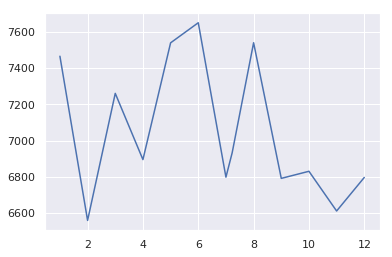

In [59]:
avg_daily_sales_by_comp_open_since_month = open.groupby('competition_open_since_month').sales.mean()
plt.plot(avg_daily_sales_by_comp_open_since_month)

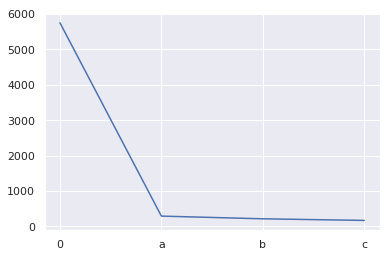

In [60]:
# Hardly anything gets sold on a state holiday - check that this is accurate if used
total_sales_by_state_holiday = \
    np.array(df[['state_holiday', 'sales']].groupby('state_holiday').sum()[['sales']]).reshape(-1)
store_counts_by_state_holiday = \
    np.array(df[['state_holiday', 'store']].groupby('state_holiday').count()[['store']]).reshape(-1)
avg_daily_sales_by_state_holiday = \
    total_sales_by_state_holiday / (store_counts_by_state_holiday)
xs = np.array((df[['state_holiday', 'sales']].groupby('state_holiday').sum()).index)
plt.plot(xs, avg_daily_sales_by_state_holiday);

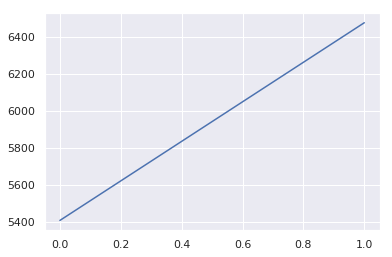

In [61]:
# School holidays are good for business - check that this is accurate if used
total_sales_by_school_holiday = \
    np.array(df[['school_holiday', 'sales']].groupby('school_holiday').sum()[['sales']]).reshape(-1)
store_counts_by_school_holiday = \
    np.array(df[['school_holiday', 'store']].groupby('school_holiday').count()[['store']]).reshape(-1)
avg_daily_sales_by_school_holiday = \
    total_sales_by_school_holiday / (store_counts_by_school_holiday)
xs = np.array((df[['school_holiday', 'sales']].groupby('school_holiday').sum()).index)
plt.plot(xs, avg_daily_sales_by_school_holiday);

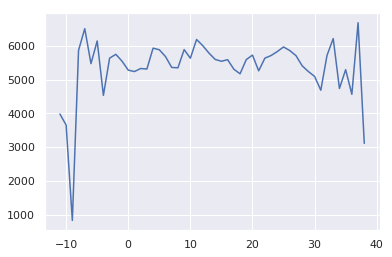

In [63]:
# Except at extreme temperatures, not much correlation between max_temperature_c and sales
total_sales_by_max_temperature_c = \
    np.array(df[['max_temperature_c', 'sales']].groupby('max_temperature_c').sum()[['sales']]).reshape(-1)
store_counts_by_max_temperature_c = \
    np.array(df[['max_temperature_c', 'store']].groupby('max_temperature_c').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_max_temperature_c = \
    total_sales_by_max_temperature_c / (store_counts_by_max_temperature_c * 942)
xs = np.array((df[['max_temperature_c', 'sales']].groupby('max_temperature_c').sum()).index)
plt.plot(xs, avg_daily_sales_by_max_temperature_c);

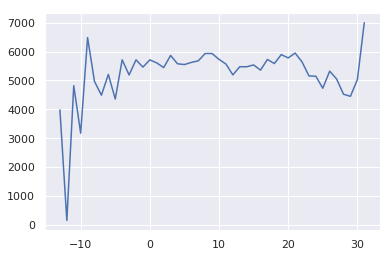

In [64]:
# Except at extreme temperatures, not much correlation between mean_temperature_c and sales
total_sales_by_mean_temperature_c = \
    np.array(df[['mean_temperature_c', 'sales']].groupby('mean_temperature_c').sum()[['sales']]).reshape(-1)
store_counts_by_mean_temperature_c = \
    np.array(df[['mean_temperature_c', 'store']].groupby('mean_temperature_c').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_mean_temperature_c = \
    total_sales_by_mean_temperature_c / (store_counts_by_mean_temperature_c * 942)
xs = np.array((df[['mean_temperature_c', 'sales']].groupby('mean_temperature_c').sum()).index)
plt.plot(xs, avg_daily_sales_by_mean_temperature_c);

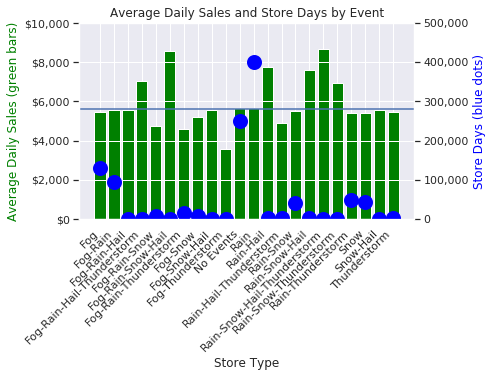

In [66]:
total_sales_by_events = \
    np.array(df[['events', 'sales']].groupby('events').sum()[['sales']]).reshape(-1)
store_counts_by_events = \
    np.array(df[['events', 'store']].groupby('events').count()[['store']]).reshape(-1)
avg_daily_sales_by_events = \
    total_sales_by_events / store_counts_by_events
xs = np.array((df[['events', 'sales']].groupby('events').sum()).index)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=xs, height=avg_daily_sales_by_events, color='green')
ax_l.set_ylim([0, 10000])
ax_r.plot(xs, store_counts_by_events, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 500000])

ax_l.set_title('Average Daily Sales and Store Days by Event')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_yticklabels(['{:,.0f}'.format(x) for x in ax_r.get_yticks()])
ax_r.set_ylabel('Store Days (blue dots)', color='blue')
ax_l.set_xlabel('Store Type')
fig.autofmt_xdate(rotation=45, ha='right')
ax_l.axhline(df.sales.mean());

# Here is Promo2 stuff with regression

In [169]:
di.loc[(di.promo2_since_year == 2014) & (di.state != 'BY'), 'promo2_since_week'].value_counts()/942

10.0    29.0
18.0     6.0
45.0     3.0
1.0      3.0
14.0     1.0
23.0     1.0
Name: promo2_since_week, dtype: float64

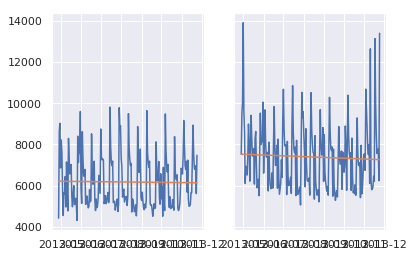

In [104]:
#pd.to_datetime('2013-08-11') - pd.to_timedelta(15, unit='W') # Timestamp('2013-04-28 00:00:00')
#pd.to_datetime('2013-08-11') + pd.to_timedelta(15, unit='W') # Timestamp('2013-11-24 00:00:00')
#pd.to_datetime('2013-08-11').strftime('%Y-%W') # 2013 - 31
#pd.to_datetime('2013-04-28').strftime('%Y-%W') # 2014 - 16
#pd.to_datetime('2013-11-24').strftime('%Y-%W') # 2014 - 46

# Prep the data for display                                                                                                                                                                     
open = df[df.open == 1]
promo2 = open[(open.date >= '2013-04-28') & (open.date <= '2013-11-24') & (open.promo2 == 1)]                                                                                                                                                                   
non_promo2 = open[(open.date >= '2013-04-28') & (open.date <= '2013-11-24') & (open.promo2 == 0)]                                                                                                                                                               
avg_sales_by_promo2 = promo2.groupby('date').sales.mean()                                                                                                                                       
avg_sales_by_non_promo2 = non_promo2.groupby('date').sales.mean()                                                                                                                               

# Create regressions for the two avg_sales_by_ lines                                                                                                                                            
xs = np.linspace(0, 211, 211)                                                                                                                                                                   
a0, b0 = np.polyfit(xs, avg_sales_by_promo2, deg=1)                                                                                                                                             
a1, b1 = np.polyfit(xs, avg_sales_by_non_promo2, deg=1)                                                                                                                                         

fake = np.ones(211) * 6000
# Create and display the chart                                                                                                                                                                  
fig, (ax0, ax1) = plt.subplots(1, 2, sharex='col', sharey='row')                                                                                                                                
ax0.plot(avg_sales_by_promo2)                                                                                                                                                                   
#ax0.plot(xs, a0*xs + b0)                                                                                                                                                                        
ax0.plot(avg_sales_by_promo2.index, a0*xs+b0)
ax1.plot(avg_sales_by_non_promo2)                                                                                                                                                               
ax1.plot(avg_sales_by_non_promo2.index, a1*xs + b1)  

7390.205661709865
6170.526615542154
-0.3495524428728693
-1.2659457926266768


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5629
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.454
Time:                        22:39:59   Log-Likelihood:                -1773.3
No. Observations:                 211   AIC:                             3551.
Df Residuals:                     209   BIC:                             3557.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dates         -0.9208      1.227     -0.750      0.454      -3.340       1.499
ones        1316.3585    148.976      8.836      0.000    1022.671    1610.047
==============================================================================
Omnibus:                      129.974   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.979
Skew:                           2.537   Prob(JB):                    8.92e-146
Kurtosis:                      10.087   Cond. No.                         242.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

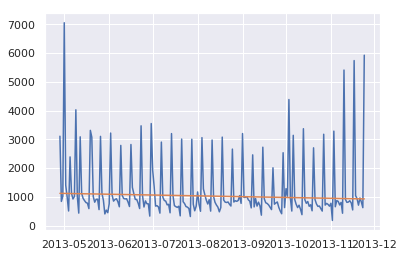

In [105]:
import statsmodels.formula.api as sm
#a0 # -0.3495524428728693
#a1 # -1.2659457926266768
diff0 = pd.DataFrame(avg_sales_by_non_promo2 - avg_sales_by_promo2)
diff0['ones'] = 1
diff0['dates'] = diff.index.to_julian_date() - 2456620.5
Y = diff0['sales']
X = diff0[['dates', 'ones']]
result = sm.OLS( Y, X ).fit()

fig, ax = plt.subplots()
ax.plot(diff0['sales'])
ax.plot(1122.9995 + diff0['dates']*(-.9208))

print(avg_sales_by_non_promo2.mean())
print(avg_sales_by_promo2.mean())
print(a0)
print(a1)
result.summary()

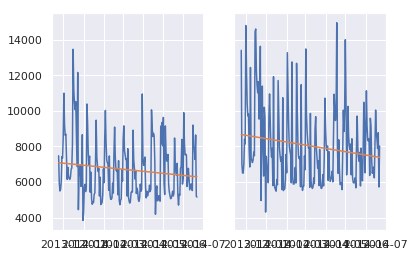

In [106]:
# Prep the data for display                                                                                                                                                                     
open = df[df.open == 1]
promo2 = open[(open.date >= '2013-11-24') & (open.date <= '2014-06-22') & (open.promo2 == 1)]                                                                                                                                                                   
non_promo2 = open[(open.date >= '2013-11-24') & (open.date <= '2014-06-22') & (open.promo2 == 0)]                                                                                                                                                               
avg_sales_by_promo2 = promo2.groupby('date').sales.mean()                                                                                                                                       
avg_sales_by_non_promo2 = non_promo2.groupby('date').sales.mean()                                                                                                                               

# Create regressions for the two avg_sales_by_ lines                                                                                                                                            
xs = np.linspace(0, 211, 211)                                                                                                                                                                   
a0, b0 = np.polyfit(xs, avg_sales_by_promo2, deg=1)                                                                                                                                             
a1, b1 = np.polyfit(xs, avg_sales_by_non_promo2, deg=1)                                                                                                                                         

fake = np.ones(211) * 6000
# Create and display the chart                                                                                                                                                                  
fig, (ax0, ax1) = plt.subplots(1, 2, sharex='col', sharey='row')                                                                                                                                
ax0.plot(avg_sales_by_promo2)                                                                                                                                                                   
#ax0.plot(xs, a0*xs + b0)                                                                                                                                                                        
ax0.plot(avg_sales_by_promo2.index, a0*xs+b0)
ax1.plot(avg_sales_by_non_promo2)                                                                                                                                                               
ax1.plot(avg_sales_by_non_promo2.index, a1*xs + b1)  

8024.892714193883
6685.9914095270615
-3.752591236770592
-6.06666187351059


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.369
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.125
Time:                        22:40:31   Log-Likelihood:                -1817.1
No. Observations:                 211   AIC:                             3638.
Df Residuals:                     209   BIC:                             3645.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dates         -2.3251      1.511     -1.539      0.125      -5.303       0.653
ones        1583.0358    183.373      8.633      0.000    1221.538    1944.533
==============================================================================
Omnibus:                       98.577   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.340
Skew:                           2.122   Prob(JB):                     8.09e-62
Kurtosis:                       6.740   Cond. No.                         242.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

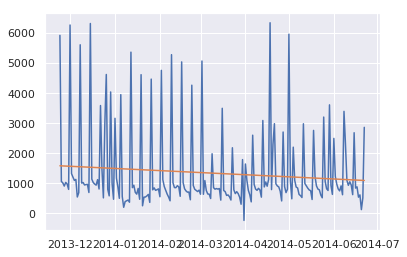

In [107]:
import statsmodels.formula.api as sm
#a0 # -3.752591236770592
#a1 # -6.06666187351059
diff1 = pd.DataFrame(avg_sales_by_non_promo2 - avg_sales_by_promo2)
diff1['ones'] = 1
diff1['dates'] = diff1.index.to_julian_date() - 2456620.5
Y = diff1['sales']
X = diff1[['dates', 'ones']]
result = sm.OLS( Y, X ).fit()

fig, ax = plt.subplots()
ax.plot(diff1['sales'])
ax.plot(1583.0358 + diff1['dates']*(-2.3251))

print(avg_sales_by_non_promo2.mean())
print(avg_sales_by_promo2.mean())
print(a0)
print(a1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.001369
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.971
Time:                        22:49:58   Log-Likelihood:                -3597.1
No. Observations:                 422   AIC:                             7198.
Df Residuals:                     420   BIC:                             7206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dates          0.0181      0.488      0.037      0.971      -0.941       0.977
ones        1275.4898    118.666     10.749      0.000    1042.237    1508.742
==============================================================================
Omnibus:                      216.676   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              910.343
Skew:                           2.377   Prob(JB):                    2.10e-198
Kurtosis:                       8.402   Cond. No.                         486.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

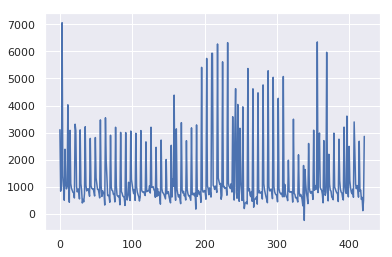

In [129]:
#pd.DataFrame(columns=['sales', 'ones', 'dates', '1sales'], data=(np.hstack((np.array(diff0[['sales','ones','dates']]), np.array((diff1[['sales']]))))))
diff2 = diff1.copy()
diff2['dates'] = diff1['dates'] + 211
new_diff = pd.DataFrame(columns=['sales', 'ones', 'dates'], data=(np.vstack((np.array(diff0[['sales','ones','dates']]), np.array((diff2[['sales', 'ones', 'dates']]))))))
new_diff.head(15)

Y = new_diff['sales']
X = new_diff[['dates', 'ones']]
result = sm.OLS( Y, X ).fit()

fig, ax = plt.subplots()
ax.plot(new_diff['sales'])
#ax.plot(1583.0358 + new_diff['dates']*(-2.3251))

#print(avg_sales_by_non_promo2.mean())
#print(avg_sales_by_promo2.mean())
#print(a0)
#print(a1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.369
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.125
Time:                        21:46:20   Log-Likelihood:                -1165.3
No. Observations:                 211   AIC:                             2335.
Df Residuals:                     209   BIC:                             2341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.457e+06      5.928   4.14e+05      0.000    2.46e+06    2.46e+06
x1            -0.0048      0.003     -1.539      0.125      -0.011       0.001
==============================================================================
Omnibus:                       94.090   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.462
Skew:                           0.018   Prob(JB):                      0.00197
Kurtosis:                       1.810   Cond. No.                     2.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

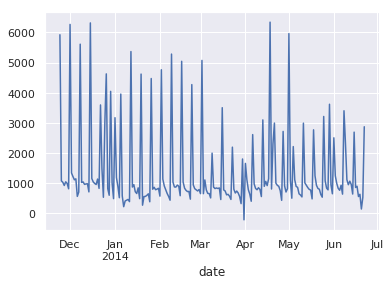

In [37]:
#a0 # -3.752591236770592
#a1 # -6.06666187351059
diff = avg_sales_by_non_promo2 - avg_sales_by_promo2
diff.plot()

import statsmodels.api as sm # import statsmodels 

X = diff.values ## X usually means our input variables (or independent variables)
#data_df['Date']=data_df['Date'].map(dt.datetime.toordinal)
#y = diff.index.map(dt.datetime.toordinal)
y = np.array(diff.index.to_julian_date())
#y = pd.to_timedelta((diff.index - diff.index.min()).dt.days) ## Y usually means our output/dependent variable
#y = np.array(pd.to_timedelta(diff.index - diff.index.min()).days) ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

# Stuff on stores closing Jul-Dec 2014

In [283]:
dx = df.copy()
dx['date'] = pd.to_datetime(dx['date'])
dx['moyr'] = dx.date.apply(lambda x: x.strftime('%B-%Y'))
dy = dx.groupby(['state', 'store', 'moyr']).sum()
dy.reset_index(level=[0,1,2], drop=False, inplace=True)
dy['moyr'] = pd.to_datetime(dy['moyr'])
dy.head()

,state,store,moyr,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,...,promo2,promo2_since_week,promo2_since_year,day_of_week,sales,customers,open,promo,school_holiday,trend
0,BE,4,2013-04-01,398,271,140,153,74,-12,2573,...,0,707.863398,60352.907180,85,226981.0,32197.0,25.0,12.0,5.0,1867
1,BE,4,2014-04-01,507,358,210,251,165,67,2689,...,0,707.863398,60352.907180,87,231535.0,32140.0,24.0,11.0,10.0,1845
2,BE,4,2015-04-01,440,272,101,159,52,-57,2696,...,0,707.863398,60352.907180,89,248088.0,32897.0,24.0,11.0,8.0,1813
3,BE,4,2013-08-01,758,608,453,459,378,296,2753,...,0,731.458844,62364.670753,96,238263.0,34544.0,27.0,12.0,2.0,2287
4,BE,4,2014-08-01,708,555,400,421,328,214,2785,...,0,731.458844,62364.670753,99,258473.0,34404.0,26.0,11.0,16.0,2156


In [403]:
#dz = df.copy()
#dz['date'] = pd.to_datetime(dz['date'])
#dz['year'] = dz.date.dt.year
#dz['month'] = dz.date.dt.month
sums = dz.groupby(['store', 'year', 'month']).sum().copy()
sums.reset_index(level=2, drop=False, inplace=True)
sums[(sums.sales == 0) & (sums.month.isin(range(7)))]

month  max_temperature_c  mean_temperature_c  min_temperature_c  \
store year                                                                    
103   2013      1                 56                  -8                -67   
      2013      2                 55                   3                -45   
      2013      3                 79                 -24               -133   
      2013      4                398                 271                140   
      2013      5                592                 437                292   
      2013      6                669                 524                376   
349   2013      1                 56                  -8                -67   
      2013      2                 55                   3                -45   
      2013      3                 79                 -24               -133   
589   2013      4                439                 307                181   
972   2014      6                651                 488                324   
1081  2013      1                 56                  -8                -67   
      2013      2                 55                   3                -45   
      2013      3                 79                 -24               -133   
      2013      4                398                 271                140   
      2013      5                592                 437                292   
      2013      6                669                 524                376   

            dew_point_c  mean_dew_point_c  min_dew_point_c  max_humidity  \
store year                                                                 
103   2013           12               -47             -117          2961   
      2013           -2               -48              -99          2702   
      2013          -96              -161             -225          2805   
      2013          153                74              -12          2573   
      2013          338               255              167          2760   
      2013          409               326              241          2632   
349   2013           12               -47             -117          2961   
      2013           -2               -48              -99          2702   
      2013          -96              -161             -225          2805   
589   2013          186               101               22          2561   
972   2014          391               324              254          2697   
1081  2013           12               -47             -117          2961   
      2013           -2               -48              -99          2702   
      2013          -96              -161             -225          2805   
      2013          153                74              -12          2573   
      2013          338               255              167          2760   
      2013          409               326              241          2632   

            mean_humidity  min_humidity  ...    promo2  promo2_since_week  \
store year                               ...                                
103   2013           2661          2194  ...         0         731.458844   
      2013           2368          1840  ...         0         660.672504   
      2013           2188          1382  ...         0         731.458844   
      2013           1860          1057  ...         0         707.863398   
      2013           2074          1185  ...         0         731.458844   
      2013           1889          1067  ...         0         707.863398   
349   2013           2661          2194  ...         0         731.458844   
      2013           2368          1840  ...         0         660.672504   
      2013           2188          1382  ...         0         731.458844   
589   2013           1877          1038  ...        30         540.000000   
972   2014           1917          1153  ...         0         707.863398   
1081  2013           2661          2194  ...         0         7

In [423]:
#len(sums[(sums.sales == 0) & (sums.month.isin([12]))])
len(sums[(sums.sales == 0) & (sums.month.isin(range(7,13)))]) # 1083
sums[(sums.sales == 0) & (sums.month.isin(range(7,13)))].head()

month  max_temperature_c  mean_temperature_c  min_temperature_c  \
store year                                                                    
13    2014      7                731                 562                404   
      2014      8                658                 501                360   
      2014      9                577                 426                286   
      2014     10                478                 341                211   
      2014     11                254                 161                 82   

            dew_point_c  mean_dew_point_c  min_dew_point_c  max_humidity  \
store year                                                                 
13    2014          498               426              353          3041   
      2014          446               379              295          3028   
      2014          416               353              262          2969   
      2014          351               288              190          3080   
      2014          183               131               70          2993   

            mean_humidity  min_humidity  ...    promo2  promo2_since_week  \
store year                               ...                                
13    2014           2386          1623  ...        31             1395.0   
      2014           2435          1678  ...        31             1395.0   
      2014           2581          1932  ...        30             1350.0   
      2014           2770          2214  ...        31             1395.0   
      2014           2787          2429  ...        30             1350.0   

            promo2_since_year  day_of_week  sales  customers  open  promo  \
store year                                                                  
13    2014            62279.0           90    0.0        0.0   0.0    0.0   
      2014            62279.0           99    0.0        0.0   0.0    0.0   
      2014            60270.0           85    0.0        0.0   0.0    0.0   
      2014            62279.0           93    0.0        0.0   0.0    0.0   
      2014            60270.0           95    0.0        0.0   0.0    0.0   

            school_holiday  trend  
store year                         
13    2014             0.0   2016  
      2014             0.0   2145  
      2014             0.0   2009  
      2014             0.0   2126  
      2014             0.0   2319  

[5 rows x 35 columns]

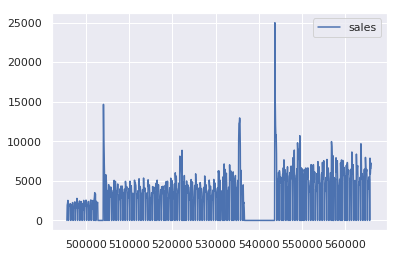

In [436]:
#train = pd.read_csv('../../data/raw/train.csv', low_memory=False)
#train['Date'] = pd.to_datetime(train['Date'])
#len(train[(train.Open == 0) & (train.Date.dt.dayofweek != 6)]) #31680
##train.head()
trainz = train.copy()
trainz['Date'] = pd.to_datetime(trainz['Date'])
trainz['year'] = trainz.Date.dt.year
trainz['month'] = trainz.Date.dt.month
sumz = trainz.groupby(['Store', 'year', 'month']).sum().copy()
sumz.reset_index(level=2, drop=False, inplace=True)
len(sumz[(sumz.Sales == 0) & (sumz.month.isin(range(7)))]) # 17
len(sumz[(sumz.Sales == 0) & (sumz.month.isin(range(7, 13)))]) # 3
len(sumz) # 33485
len(train) #1017209
len(sums) # 34565
len(sumz[(sumz.Sales == 0)]) # 20
(sumz[(sumz.Sales == 0)]) 
#train[(train.Store.isin(stores)) & (train.Date >= '2014-07-01') & (train.Date < '2015-01-01') & (train.Sales > 0)
#     & (train.Store != 708) & (train.Store != 972)]
#train[(train.Store.isin(stores)) & (train.Date >= '2014-07-01') & (train.Date < '2015-01-01') & (train.Sales > 0)]

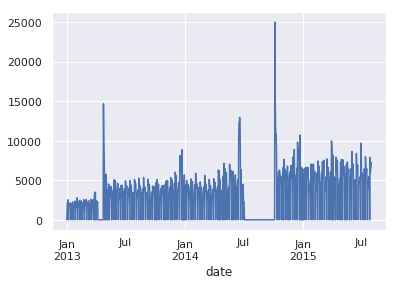

In [476]:
di.loc[di.store == 708, 'sales'].plot()

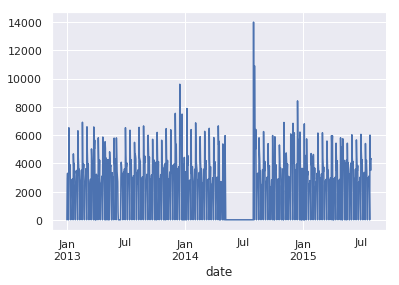

In [478]:
di.loc[di.store == 972, 'sales'].plot()

In [477]:
len(df[df.state == 'BY'])/942

180.0

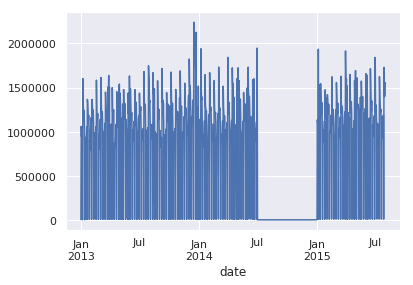

In [479]:
BY_stores = df.loc[df.state == 'BY', 'store'].unique()
#len(stores) #182
di[di.store.isin(BY_stores)].groupby('date').sales.sum().plot();
#df[(df.store.isin(stores)) & (df.date == '2014-12-03') & (df.sales != 0)]
#df.loc[df.store.isin(stores), 'state'].value_counts()/942 # BY 180
#df[df.store == 972] # ST
#df[df.store == 708] # SN

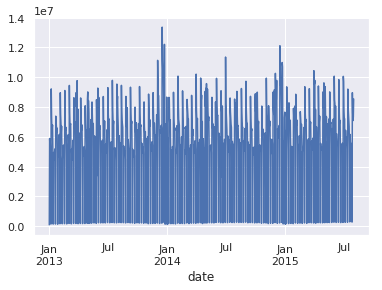

In [615]:
non_stores = di.loc[~di.store.isin(stores)].copy()
non_stores.groupby(non_stores.index).sales.sum().plot();

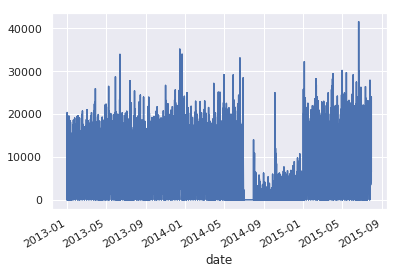

In [439]:
di.loc[di.store.isin(stores), 'sales'].plot()

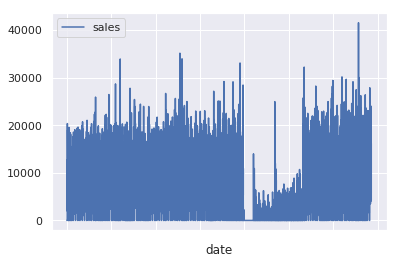

In [342]:
stores = dy.loc[(dy.sales == 0) & (dy.moyr > pd.to_datetime('2014-06')), 'store'].unique()
df.loc[(df.store.isin(stores)), ['date', 'sales']].set_index('date').sort_index().plot()

In [231]:
#dx = di.copy()
#dx = dx['2014-08':'2014-10']
#dx['mnth_yr'] = dx[dx.index].apply(lambda x: x.strftime('%B-%Y'))     
#dx.set_index(['store', dx.index], inplace=True)
#dx.groupby(dx.index[0], dx.index)
#dx.index[0][1]
#dx['mnth_yr'] = dx[dx.index].apply(lambda tup: tup[1].strftime('%B-%Y'))     
#dx.head()
#dx[dx.index].apply(lambda x: x.strftime('%B-%Y'))
dx = df.copy()
dx['date'] = pd.to_datetime(dx['date'])
dx = dx[(dx.date >= '2014-08') & (dx.date <= '2014-09')]
dx['yr-mo'] = dx.date.apply(lambda x: x.strftime('%B-%Y'))
dxg = dx.groupby(['store', 'yr-mo']).sum().copy()
#dxg.loc[dxg.sales == 0, 'store'].nunique()
dxg = dxg.unstack('yr-mo')
dxg.head()


max_temperature_c                mean_temperature_c                 \
yr-mo       August-2014 September-2014        August-2014 September-2014   
store                                                                      
1                   686             19                543             16   
2                   635             17                485             13   
3                   648             19                518             13   
4                   708             17                555             14   
5                   663             16                531             14   

      min_temperature_c                dew_point_c                 \
yr-mo       August-2014 September-2014 August-2014 September-2014   
store                                                               
1                   401             11         462             12   
2                   347             10         409             12   
3                   389              7         443             14   
4                   400             12         421             14   
5                   395             12         426             13   

      mean_dew_point_c                     ...         customers  \
yr-mo      August-2014 September-2014      ...       August-2014   
store                                      ...                     
1                  385             11      ...           13088.0   
2                  336             11      ...           14552.0   
3                  369             12      ...           18372.0   
4                  328             12      ...           34404.0   
5                  352             12      ...           13136.0   

                            open                      promo                 \
yr-mo September-2014 August-2014 September-2014 August-2014 September-2014   
store                                                                        
1              561.0        26.0            1.0        11.0            1.0   
2              805.0        26.0            1.0        11.0            1.0   
3              962.0        26.0            1.0        11.0            1.0   
4             1796.0        26.0            1.0        11.0            1.0   
5              758.0        26.0            1.0        11.0            1.0   

      school_holiday                      trend                 
yr-mo    August-2014 September-2014 August-2014 September-2014  
store                                                           
1               31.0            1.0        2285             74  
2               21.0            0.0        2334             65  
3               13.0            0.0        2363             76  
4               16.0            0.0        2156             68  
5               21.0            0.0        2391             73  

[5 rows x 68 columns]

In [166]:
dm = df.copy()
dm['date'] = pd.to_datetime(dm['date'])
dm['month'] = dm['date'].dt.month
dm['year'] = dm['date'].dt.year
#dm['month'] = pd.DatetimeIndex(dm['date']).month
#dm['year'] = pd.DatetimeIndex(dm['date']).year
dm = dm.query("date >= '2014-08-01' & date <= '2014-09-01'").copy()
#dm.groupby('store').sales.sum().value_counts()
#dm.index[dm.groupby('store').sales.sum() == 0]
#gb = dm.groupby('store').sales
#gb.get_group(sum() == 0)
dm.head()

,store,state,date,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,...,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start,month,year
64624,1,HE,2014-08-01,28,21,15,17,14,12,94,...,5038.0,572.0,1.0,1.0,0,1.0,80,2014-07-27,8,2014
64625,56,HE,2014-08-01,28,21,15,17,14,12,94,...,9516.0,625.0,1.0,1.0,0,1.0,80,2014-07-27,8,2014
64626,69,HE,2014-08-01,28,21,15,17,14,12,94,...,11180.0,1318.0,1.0,1.0,0,1.0,80,2014-07-27,8,2014
64627,77,HE,2014-08-01,28,21,15,17,14,12,94,...,8608.0,702.0,1.0,1.0,0,1.0,80,2014-07-27,8,2014
64628,111,HE,2014-08-01,28,21,15,17,14,12,94,...,8847.0,684.0,1.0,1.0,0,1.0,80,2014-07-27,8,2014


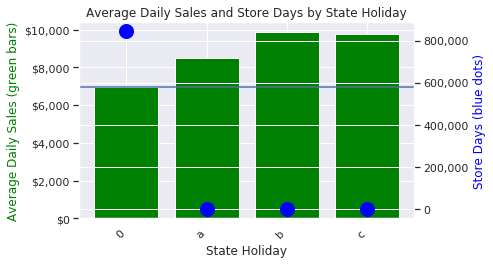

In [61]:
open = df[df.open == 1].copy()

total_sales_by_state_holiday = \
    np.array(open[['state_holiday', 'sales']].groupby('state_holiday').sum()[['sales']]).reshape(-1)
store_counts_by_state_holiday = \
    np.array(open[['state_holiday', 'store']].groupby('state_holiday').count()[['store']]).reshape(-1)
avg_daily_sales_by_state_holiday = \
    total_sales_by_state_holiday / store_counts_by_state_holiday
xs = np.array((open[['state_holiday', 'sales']].groupby('state_holiday').sum()).index)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=xs, height=avg_daily_sales_by_state_holiday, color='green')
ax_r.plot(xs, store_counts_by_state_holiday, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
#ax_r.set_ylim([0, 550000])

ax_l.set_title('Average Daily Sales and Store Days by State Holiday')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_yticklabels(['{:,.0f}'.format(x) for x in ax_r.get_yticks()])
ax_r.set_ylabel('Store Days (blue dots)', color='blue')
ax_l.set_xlabel('State Holiday')
fig.autofmt_xdate(rotation=45, ha='right')
ax_l.axhline(open.sales.mean());

#len(open[open.state_holiday == 'a']) # 694
#len(open[open.state_holiday == 'b']) # 145
#len(open[open.state_holiday == 'c']) # 71
#len(open[open.state_holiday == '0']) # 843,430

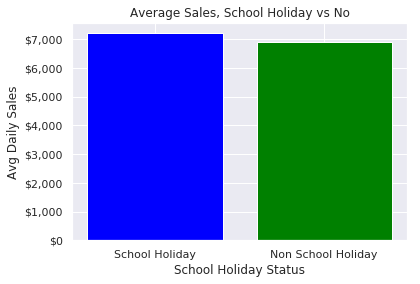

In [56]:
# School holiday vs no
open = df[df.open == 1].copy()

avg_sch_sales = open.loc[open.school_holiday == 1, 'sales'].mean()
avg_non_sch_sales = open.loc[open.school_holiday == 0, 'sales'].mean()

fig, ax = plt.subplots()

ax.bar(x=['School Holiday', 'Non School Holiday'],
       height=[avg_sch_sales, avg_non_sch_sales], color=['blue', 'green'])

ax.set_title('Average Sales, School Holiday vs No')
ax.set_ylabel('Avg Daily Sales')
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.set_xlabel('School Holiday Status');

#len(open[open.school_holiday == 1]) # 163,445
#len(open[open.school_holiday == 0]) # 680,895

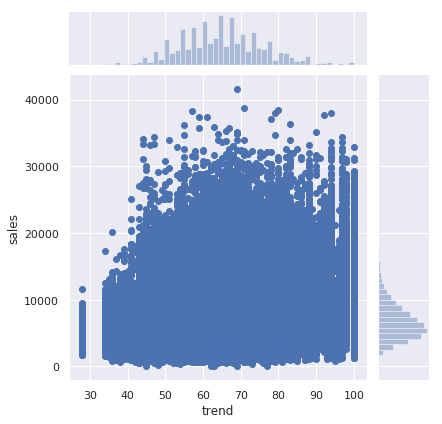

In [73]:
#sns.jointplot('sales', 'trend', data=df[df.open == 1])
sns.jointplot('trend', 'sales', data=df[df.open == 1])

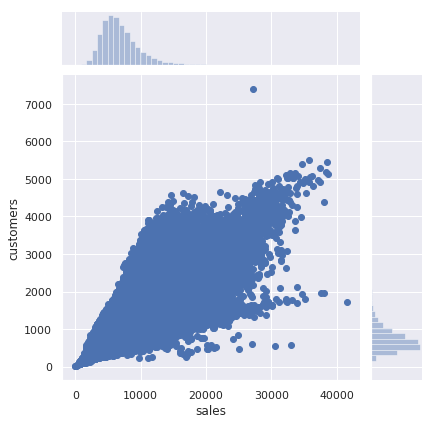

In [42]:
sns.jointplot('sales', 'customers', data=df[df.open == 1])

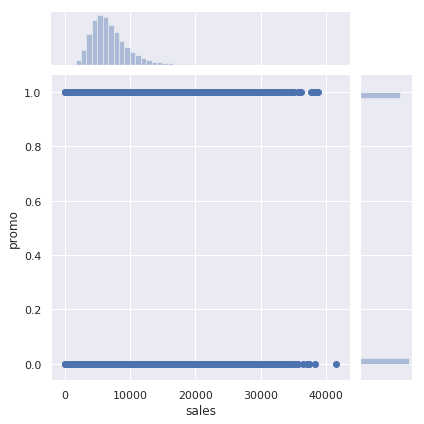

In [69]:
sns.jointplot('sales', 'promo', data=df[df.open == 1])

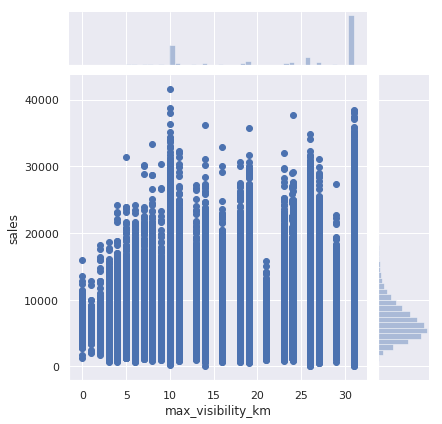

In [72]:
#sns.jointplot('sales', 'max_visibility_km', data=df[df.open == 1])
sns.jointplot('max_visibility_km', 'sales', data=df[df.open == 1])

In [82]:
no_cats = df.copy()
#no_cats.dtypes[no_cats.dtypes == 'object']
# state, events, store_type, assortment, promo_interval, state_holiday, week_start
no_cats.replace({'assortment': {'a': 0, 'b': 1, 'c': 2}, 'store_type': {'a': 0, 'b': 1, 'c': 2, 'd': 3}, 
    'promo_interval': {'None': 0, 'Jan,Apr,Jul,Oct': 1, 'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3}, 
    'state_holiday': {'0': 0, 'a': 1, 'b': 2, 'c': 3}, 'state': {'BE': 0, 'BW': 1, 'BY': 2, 'HB,NI': 3,
    'HE': 4, 'HH': 5, 'NW': 6, 'RP': 7, 'SH': 8, 'SN': 9, 'ST': 10, 'TH': 11}}, inplace=True)
no_cats['week_start'] = pd.to_datetime(no_cats.week_start)
no_cats['week_start'] = no_cats['week_start'] - pd.to_datetime('2012-12-30')
no_cats['week_start'] = no_cats['week_start'].dt.days
no_cats.week_start.max()
no_cats.corr()['sales']

store                           0.006779
state                           0.007250
max_temperature_c              -0.002195
mean_temperature_c             -0.000982
min_temperature_c              -0.001029
dew_point_c                    -0.017577
mean_dew_point_c               -0.020435
min_dew_point_c                -0.017721
max_humidity                   -0.047872
mean_humidity                  -0.047422
min_humidity                   -0.049081
max_sea_level_pressureh_pa     -0.000850
mean_sea_level_pressureh_pa    -0.014560
min_sea_level_pressureh_pa     -0.022368
max_visibility_km               0.082983
mean_visibility_km              0.050962
min_visibility_km               0.042883
max_wind_speed_km_h             0.051738
mean_wind_speed_km_h            0.061571
max_gust_speed_km_h             0.030297
precipitationmm                -0.006101
cloud_cover                    -0.010658
wind_dir_degrees               -0.001720
store_type                     -0.022359
assortment      

4674.960123284655

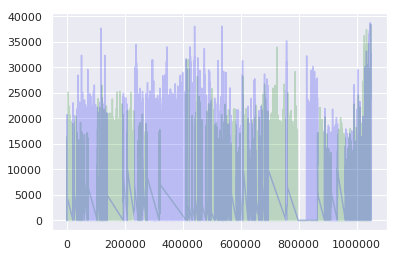

In [105]:
#df.groupby(df['trend']//10).sales.plot()
plt.plot(df[(df.trend < 60)].sales, color='green', alpha=0.2)
plt.plot(df[(df.trend > 70)].sales, color='blue', alpha=0.2)
df[(df.trend < 50)].sales.mean() #4674
df[(df.trend < 60)].sales.mean() #5041
df[(df.trend > 70)].sales.mean() #6217
df[(df.trend > 80)].sales.mean() #6713